In [87]:
'''

Color Identification using Machine Learning

KMeans, to extract colors from a give image.
OpenCV2 for image manipulation, apply KMeans to identify the major colors
and then plot the information using Matplotlib.

Import libraries

We need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs,
numpy to work with arrays, cv2 to work with image data, collections to use Counter to count values, 
rgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors.
'''

'\n\nColor Identification using Machine Learning\n\nKMeans, to extract colors from a give image.\nOpenCV2 for image manipulation, apply KMeans to identify the major colors\nand then plot the information using Matplotlib.\n\nImport libraries\n\nWe need sklearn for KMeans algorithm, matplotlib.pyplot for plotting graphs,\nnumpy to work with arrays, cv2 to work with image data, collections to use Counter to count values, \nrgb2lab to convert RGB values and deltaE_cie76 to calculate similarity between colors.\n'

In [88]:

#pip install requests

In [89]:
#!pip install opencv-python


In [90]:


#plt.figure(figsize = (8, 6))
#plt.pie(result, labels = result, colors =result)
    

#print(resp['colors'][0]['rgb']['value'])
#print(resp['colors'][1]['hex']['value'])


In [91]:
#import json
#c=json.load(r)

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [93]:
'''First, we will define a function that can give us
the hex values of our the colors that we will identify.'''

'First, we will define a function that can give us\nthe hex values of our the colors that we will identify.'

In [94]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [95]:
'''KMeans expects flattened array as input during its fit method.
Thus, we need to reshape the image using numpy. 
Then, we can apply KMeans to first fit and then predict on 
the image to get the results. 
Then, the cluster colors are identified an arranged in the correct order.
We plot the colors as a pie chart.

Combined all the steps in two method.'''

'KMeans expects flattened array as input during its fit method.\nThus, we need to reshape the image using numpy. \nThen, we can apply KMeans to first fit and then predict on \nthe image to get the results. \nThen, the cluster colors are identified an arranged in the correct order.\nWe plot the colors as a pie chart.\n\nCombined all the steps in two method.'

In [96]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [112]:
def get_colors(image, number_of_colors, show_chart):
    
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    
    #print(modified_image.shape)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    #print(modified_image.shape)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    
    counts = Counter(labels)
    #print(counts.values())
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    #print(hex_colors)

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

In [98]:
from tkinter import filedialog
from tkinter import *
import requests

In [99]:
def loadFile():
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("all files","*.*"),("all files","*.*")))
    #print ("For the first document, you selected:  "  + root.filename)
    root.destroy()
    return root.filename

In [117]:
def scheme(gen):
    result=[]
#rgb='rgb'+'('+ str(gen[0][0])+str(gen[0][1])+str(gen[0][2])+')'
    for i in range(len(gen)):
        rgb='rgb'+'('+ str(gen[i][0])+str(gen[i][1])+str(gen[i][2])+')'
        payload = {'rgb': rgb,'mode':'analogic'}
        r = requests.get(' http://thecolorapi.com/scheme', params=payload)
        resp=r.json()
        temp=[]
        for i in range(len(resp['colors'])):
            temp.append(resp['colors'][i]['hex']['value'])
        result.append(temp)
    return result

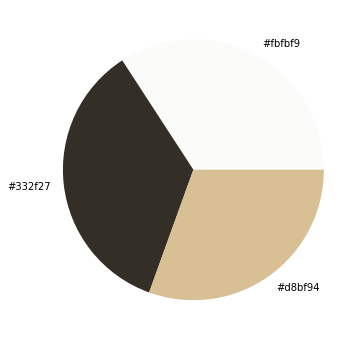

In [118]:
path=loadFile()
gen=get_colors(get_image(path),3, True)

#print('rgb'+'('+ str(gen[0][0])+str(gen[0][1])+str(gen[0][2])+')')


['#EC0606', '#F24C05', '#F99704', '#FCE405', '#CDFE09']


([<matplotlib.patches.Wedge at 0x2d70fcfe0c8>,
 [Text(0.8899186877588753, 0.6465637858537406, '#EC0606'),
  Text(-0.3399187231970732, 1.046162158377023, '#F24C05'),
  Text(-1.0999999999999988, -5.149471622296949e-08, '#F99704'),
  Text(-0.33991862524830174, -1.0461621902025062, '#FCE405'),
  Text(0.8899187482945414, -0.6465637025335375, '#CDFE09')])

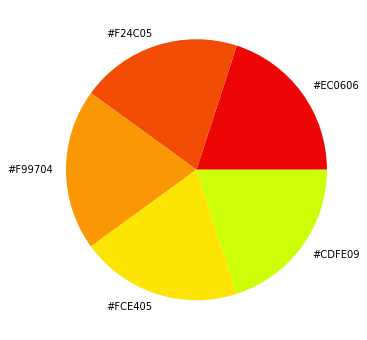

In [120]:
out=scheme(gen)
val=np.ones(5)

print(out[0])
plt.figure(figsize = (8, 6))
plt.pie(val, labels = out[0], colors =out[0])